# Influencer Analyse basierend auf Zentralitätsmaßen auf dem Twitter Streamer Netzwerk

## Leitfrage Projekt 
- "Wer sind die **5 einflussreichsten Twitter Influencer** im **Game Streaming** Bereich?"


    
    

## network measures 
### global characteristics:
- Density
- Average Clustering Coefficient
- Reciprocity
- Triadic Closure
- Bridges
- Center
- Diameter 


### local (node) chracteristics:
- Degree Centrality
- Eigenvector Centrality
- PageRank
- Betweenness Centrality
- Closeness Centrality


In [2]:
import pandas as pd
import networkx as nx
import nxviz as nv 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [3]:
#load the nx graph object, stored in a pickle file
G = nx.read_gpickle("who_follows_who_new2.pickle")

In [4]:
#inspect graph object
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 78
Number of edges: 1223
Average in degree:  15.6795
Average out degree:  15.6795


## Some networkx Visualizations

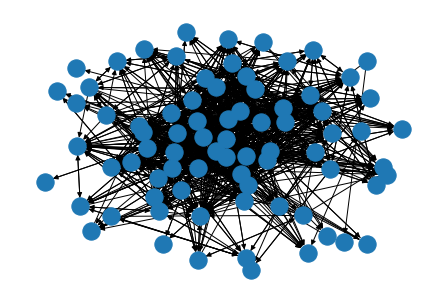

In [5]:
pos=nx.spring_layout(G, k=1,iterations=30)#k=distance between nodes from 0.1 to 1
nx.draw(G, with_labels=False, pos=pos)


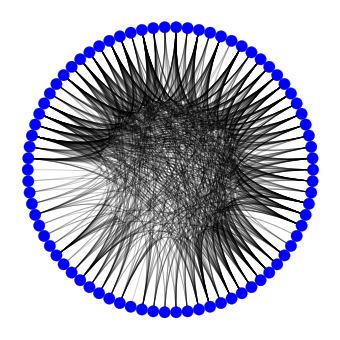

In [6]:

c = nv.plots.CircosPlot(G, node_order='followerCount')
c.draw()
plt.show() 

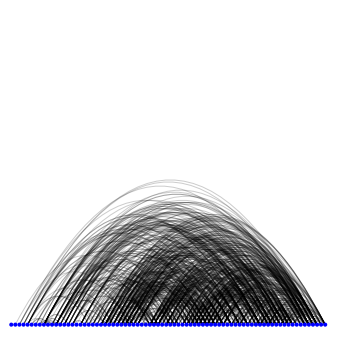

In [7]:
c = nv.plots.ArcPlot(G, node_order='followerCount')
c.draw()
plt.show() 

In [8]:
#How many followers do the isolated nodes have?
isolated_nodes = list(nx.isolates(G))
for node, d in G.nodes(data=True):
    if node in isolated_nodes:
        print(node)
        print(d["followerCount"])


In [9]:
#remove isolated nodes
'''
G.remove_nodes_from(list(nx.isolates(G)))
nx.draw(G, with_labels=True)
'''

'\nG.remove_nodes_from(list(nx.isolates(G)))\nnx.draw(G, with_labels=True)\n'

### Network Density
How many edges exist compared to maximum amount of possible edges in graph

In [10]:
#DENSITY: How many edges exist compared to max amount possible edges
density = nx.density(G)
print("Network density:", density)

Network density: 0.20362970362970362


### Average Clustering Coefficient

It is observed that people who share connections in a social network tend to form associations. In other words, there is a tendency in a social network to form clusters. 

We can determine the clusters of a node, Local Clustering Coefficient, which is the **fraction of pairs of the node's neighbors (that is connections) that are connected with each other.**

If we calculate this for every node in the graph, and divide it by the total number of nodes, we get the average clustering coefficient of the graph!

As an example, fully connected graph has a clustering coefficient of 1.



In [11]:
#CLUSTERING COEFFICIENT
nx.average_clustering(G)

0.5246719773662819

In [12]:
#RECIPORCITY
nx.algorithms.overall_reciprocity(G)

0.7833197056418643

In [13]:
# is the ratio of all triangles over all possible triangles. 
#So transitivity, like density, expresses how interconnected a graph is 
#in terms of a ratio of actual over possible connections.
#Transitivity allows you a way of thinking about all 
#the relationships in your graph that may exist but currently do not.

triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.49361909766534046


## Interpretation Density & CC

Clustering Coefficient ist **hoch** mit 0.5247! 
- vielzahl der möglichen Kanten existieren
- Streamer sind **sehr gut vernetzt**
- vgl. Politiker Netzwerk: 0.43

### Degree Centrality

This approach takes into account only the immediate neighbors of a node that are directly connected and not the entire structure of the network.

Degree centrality can tell you about the biggest hubs, but it can’t tell you that much about the rest of the nodes.

**d=n/N=number of neighbors/total nodes in graph.**

In [14]:
# We use the in-built degree_centrality method
deg_cen = nx.degree_centrality(G)

In [15]:
#print(deg_cen)

In [16]:
result_df=pd.DataFrame(columns=["Degree", "Eigenvektor", "PageRank", "Betweenness", "Closeness"])

In [17]:
# The following expression sorts the dictionary by
# degree centrality and returns the top 5 from a graph

deg_cen_res=sorted(deg_cen.items(),
       key=lambda x:x[1],
       reverse=True)#[0:5]
#print(deg_cen_res)

l4=[]
for item in deg_cen_res:
    a, b = item
    l4.append(a)
result_df["Degree"]=l4

In [18]:
result_df.head()

,Degree,Eigenvektor,PageRank,Betweenness,Closeness
0,mcky_tv,NaN,NaN,NaN,NaN
1,rewinside,NaN,NaN,NaN,NaN
2,MontanaBlack,NaN,NaN,NaN,NaN
3,Dhalucard,NaN,NaN,NaN,NaN
4,Lara_Loft,NaN,NaN,NaN,NaN


### Eigenvector Centrality

How many of my neighbors are also important hubs? (hub=node which points to many other nodes)

It is a kind of extension of degree centrality — it looks at a combination of a node’s edges and the edges of that node’s neighbors, **by counting how many links its connections(neighbors) have**
. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to.
It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. 

Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. If you know a lot of well-connected people, you could spread a message very efficiently


In [19]:
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
eig_res= sorted(eigenvector_dict.items(),
       key=lambda x:x[1], reverse=True)#[0:5]

l3=[]
for item in eig_res:
    a, b = item
    l3.append(a)
result_df["Eigenvektor"]=l3

# Closeness centrality

finding the individuals who are best placed to influence the entire network most quickly.

measures the average path length. thus the higher your closeness centrality value, the more your node is close to other nodes in your network. (geographic centrality)

In [20]:

clo_cen = nx.closeness_centrality(G)
clo_res= sorted(clo_cen.items(),
       key=lambda x:x[1], reverse=True)#[0:5]

l2=[]
for item in clo_res:
    a, b = item
    l2.append(a)
result_df["Closeness"]=l2

### Betweenness Centrality

definition: **sum of the fraction of all-pairs shortest paths that pass through a node.**

If we imagine that we have to pass a message on a graph from one node to another, then there may be "bottleneck" nodes for which if they are removed, then messages have a harder time flowing through the graph.

Betweenness centrality measures this form of importance. On a graph through which a generic "message" is flowing, a node with a high betweenness centrality is one that has a high proportion of shortest paths flowing through it. In other words, it behaves like a bottleneck.

-> finds nodes which are **structurally important to the network, which binds the network together and densely**.

related important terms:

- *Bonding social capital*: connections within a group
- *Briging social capital*: connections between groups

A healthy society needs a sweet spot of bonds within groups and bridges between groups -> *small world network* 
-	Six degrees of seperation between any american 
-	Describes our neurons in the brain


In [21]:
# First check unweighted (just the structure)
between_res = sorted(nx.betweenness_centrality(G).items(),
       key=lambda x:x[1], reverse=True)#[0:5]

l1=[]
for item in between_res:
    a, b = item
    l1.append(a)
result_df["Betweenness"]=l1

### Page Rank

It is based on measuring the popularity of a website.

- **Probability that in a random walk, at time t, a page is reached**
- It only depends on the **link structure** of the web -> not on it's content
- for a node, it analyzes the structure of **incoming** links
    - an incoming edge to a node increases the score
    - it is about **quality** links 


In [22]:
#PAGERANK
# by default weight attribute in PageRank is weight
# so we use weight=None to find the unweighted results
sorted_pr = sorted(nx.pagerank_numpy(G,
                weight=None).items(),
                key=lambda x:x[1], reverse=True)#[0:5]

l=[]
for item in sorted_pr:
    a, b = item
    l.append(a)

result_df["PageRank"]=l

for node in l[0:5]:
    print(node)

MontanaBlack
rewinside
mcky_tv
Lara_Loft
Papaplatte


In [23]:
l=[]
for item in sorted_pr:
    a, b = item
    l.append(a)
l

['MontanaBlack',
 'rewinside',
 'mcky_tv',
 'Lara_Loft',
 'Papaplatte',
 'AnniTheDuck',
 'Trymacs_YT',
 'Dhalucard',
 'Gronkh',
 'AmarCoDTV',
 'TANZVERBOTcf',
 'RevedTV',
 'Vlesk',
 'rezomusik',
 'maximmarkow',
 'Gnu_Official_',
 'TrilluXe',
 'Julien_Bam',
 'itsmahluna',
 'ELoTRiX',
 'Shlorox',
 'StaiyLIVE',
 'KalleKoschinsky',
 'LoLSola',
 'RepazMois',
 'Shurjoka',
 'BonjwaMental',
 'PhunkRoyaI',
 'Mexify',
 'PainLivestream',
 'Broeki2',
 'DC_Haptic',
 'BasoStream',
 'Dekarldent',
 'H0llyLP',
 'orangemorangee',
 'noway4u_sir',
 'xHankyy',
 'Kaya_Yanar',
 'dannyreturns',
 'Taddl',
 'xPandorya',
 'TheRealKnossi',
 'djanesintica',
 'Angeschrien',
 'Harmii_',
 'TolkinLoL',
 'DennisWerth_',
 'KayzahR',
 'SummonersInnDE',
 'kompetenzGHG',
 'Niklas_Wilson_',
 'AgentsRange',
 'STYLERZ97',
 'eSportsCH',
 'noahreyli',
 'EliasN97',
 'Agurinlol',
 'BigSpinCR',
 'Tayronlivereal',
 'Ditrxx',
 'VadealFN',
 'R6esportsDE',
 'JannisZFN',
 '99DAMAGEde',
 'Doktor_Froid',
 'katooyoooo',
 'alligatoah',
 'D

In [24]:
nx.pagerank_numpy(G,
                weight=None).keys()

dict_keys(['Broeki2', 'BasoStream', 'Lara_Loft', 'Tayronlivereal', 'DennisWerth_', 'DerKeller15', 'PainLivestream', 'mortenroyale', 'BigSpinCR', 'KalleKoschinsky', 'dannyreturns', 'chess24de', 'chesscom_de', 'katooyoooo', 'maxlivestream', 'itsmahluna', 'TrilluXe', 'H0llyLP', '99DAMAGEde', 'WhiteCatOsu', 'RevedTV', 'fayesxh', 'Dhalucard', 'BonjwaMental', 'Vlesk', 'AnniTheDuck', 'Gnu_Official_', 'TolkinLoL', 'Dekarldent', 'AmarCoDTV', 'noway4u_sir', 'orangemorangee', 'Shlorox', 'StaiyLIVE', 'KayzahR', 'Shurjoka', 'Doktor_Froid', 'MailandWoT', 'STYLERZ97', 'jessirocksplays', 'Mexify', 'djanesintica', 'R6esportsDE', 'VadealFN', 'Gronkh', 'xPandorya', 'MontanaBlack', 'LoLSola', 'Agurinlol', 'mcky_tv', 'AgentsRange', 'TANZVERBOTcf', 'EliasN97', 'xHankyy', 'Papaplatte', 'Trymacs_YT', 'Angeschrien', 'TheRealKnossi', 'SummonersInnDE', 'kompetenzGHG', 'rewinside', 'ELoTRiX', 'pietsmietde', 'maximmarkow', 'PhunkRoyaI', 'rezomusik', 'Julien_Bam', 'Kaya_Yanar', 'Taddl', 'DC_Haptic', 'Harmii_', 'Nik

Ein erster Unterschied im Top-5 Ranking ergibt sich beim gewichteten PageRank (betrachtet auch die Gewichte der Kanten): TrilluXe hat einen höheren PageRank, als BasoStream, obwohl letzerer mehr gemeinsame Follower mit anderen Streamern im Datensatz teilt (56449) als TrilluXe(55197). 

In [25]:
result_df.head()

,Degree,Eigenvektor,PageRank,Betweenness,Closeness
0,mcky_tv,rewinside,MontanaBlack,mcky_tv,rewinside
1,rewinside,mcky_tv,rewinside,rewinside,MontanaBlack
2,MontanaBlack,Papaplatte,mcky_tv,Lara_Loft,mcky_tv
3,Dhalucard,MontanaBlack,Lara_Loft,AmarCoDTV,Papaplatte
4,Lara_Loft,AnniTheDuck,Papaplatte,MontanaBlack,Trymacs_YT


In [26]:
result_df

,Degree,Eigenvektor,PageRank,Betweenness,Closeness
0,mcky_tv,rewinside,MontanaBlack,mcky_tv,rewinside
1,rewinside,mcky_tv,rewinside,rewinside,MontanaBlack
2,MontanaBlack,Papaplatte,mcky_tv,Lara_Loft,mcky_tv
3,Dhalucard,MontanaBlack,Lara_Loft,AmarCoDTV,Papaplatte
4,Lara_Loft,AnniTheDuck,Papaplatte,MontanaBlack,Trymacs_YT
...,...,...,...,...,...
73,eSportsCH,R6esportsDE,chesscom_de,WhiteCatOsu,R6esportsDE
74,chess24de,fayesxh,fayesxh,jessirocksplays,fayesxh
75,WhiteCatOsu,eSportsCH,WhiteCatOsu,Agurinlol,eSportsCH
76,chesscom_de,chesscom_de,pietsmietde,pietsmietde,chesscom_de


In [27]:
print("Top 5 Streamer by Follower Count")
print(sorted([(d["followerCount"], n) for n, d in G.nodes(data=True)],
    key=lambda x:x, reverse=True)[0:5])


Top 5 Streamer by Follower Count
[(1724776.0, 'Julien_Bam'), (1563457.0, 'Taddl'), (1383174.0, 'rewinside'), (1327568.0, 'Gronkh'), (979483.0, 'MontanaBlack')]


In [28]:
in_deg_iter = G.in_degree()
in_deg=[(k,v) for k, v in in_deg_iter]
sorted(in_deg,key=lambda x:x[1], reverse=True)
#GROSSE STREAMER SIND NICHT GUT VERNETZT = SIND NICHT TOP 5 FOLLOWER IM STREAMER NETZ, 
#ALSO AUCH NICHT IN RANKINGS LOGISCHERWEISE

[('MontanaBlack', 44),
 ('rewinside', 43),
 ('mcky_tv', 40),
 ('Papaplatte', 38),
 ('Trymacs_YT', 36),
 ('Lara_Loft', 33),
 ('AnniTheDuck', 33),
 ('RevedTV', 31),
 ('AmarCoDTV', 31),
 ('Dhalucard', 30),
 ('Vlesk', 30),
 ('maximmarkow', 29),
 ('rezomusik', 29),
 ('TANZVERBOTcf', 28),
 ('Gnu_Official_', 27),
 ('TrilluXe', 26),
 ('Gronkh', 26),
 ('KalleKoschinsky', 23),
 ('Shlorox', 23),
 ('StaiyLIVE', 23),
 ('LoLSola', 23),
 ('ELoTRiX', 23),
 ('BonjwaMental', 22),
 ('PhunkRoyaI', 22),
 ('Julien_Bam', 22),
 ('itsmahluna', 21),
 ('Shurjoka', 21),
 ('Mexify', 21),
 ('RepazMois', 21),
 ('BasoStream', 19),
 ('orangemorangee', 18),
 ('Broeki2', 17),
 ('PainLivestream', 17),
 ('Dekarldent', 17),
 ('noway4u_sir', 16),
 ('DC_Haptic', 16),
 ('dannyreturns', 15),
 ('H0llyLP', 15),
 ('Taddl', 14),
 ('djanesintica', 13),
 ('xHankyy', 13),
 ('Kaya_Yanar', 13),
 ('TheRealKnossi', 12),
 ('Harmii_', 12),
 ('xPandorya', 11),
 ('TolkinLoL', 10),
 ('Angeschrien', 10),
 ('SummonersInnDE', 9),
 ('noahreyli', 

In [29]:
print(G.nodes["Papaplatte"])
print(G.nodes["mcky_tv"])
print(G.nodes["Lara_Loft"])

{'followerCount': 305852.0, 'game': 4.0}
{'followerCount': 160497.0, 'game': 4.0}
{'followerCount': 86413.0, 'game': 6.0}


# Interpretation

## Allgemein
**rewinside** und **mcky_tv** sind strukturell die wichtigsten Knoten im Netzwerk. Sie sind über alle Messwerte hinweg am stärksten mit dem Rest des Graphen verbunden, durch
- degree: hat die lokal größte Anzahl an Nachbarn
- betweenness: Summe kürzester Pfade, hält das Netzwerk zusammen
- page rank: hat die wichtigsten Follower
- closeness: ist am nähesten zu allen anderen Streamern

Eine **Ausnahme** liefert **Page Rank** für **mcky_tv**, siehe mehr unten.

**Überrraschenderweise** tauchen **Taddl** und **Gronkh nicht untern den Top 5 Knoten** auf, **obwohl** die beiden unter den **Top 5 Streamer mit der größten Followerzahl sind**. Es folgt, dass Sie eher zweitrangige Bedeutung für das Netzwerk haben, und kleinere Streamer eine wichtigere Rolle im Netzwerk spielen!

## entscheidende Metriken
- beste Vernetzung eines Knoten im Netzwerk: Eigenvektor Zentralität
- Einfluss auf Informationsfluss: Betweeness Centrality
- **rewinside und mcky_tv sind die wichtigsten Influencer!**

## Betweeness Centrality
Auf Platz 1 befindet sich **überraschend mcky_tv**, der nur Platz 17 in der **Followeranzahl** ist, mit 160.497 Followern (Platz 1 Julian Bam: 1.724.776.0). Ansonsten ist das Ergebnis nicht überraschend, denn mcky_tv hat gleichzeitig auch die größte degree centrality!(In dem Fall überraschen Lara_Loft und AmorCoDTV, die 20 Streamer weniger als Nachbarn haben im vgl. zu mcky_tv, aber dennoch oben im Ranking laden) 

Daraus folgt, dass **mcky_tv**, zwar nicht die meisten Follower und Reichweite unter den Streamern hat, aber dennoch **höchst relevant für das Streamer Netzwerk** ist, da er es **dicht zusammenhält** und den **Informationsfluss bestimmt**. Er hat das größte **briging capital**, er baut eine *Brücke* zwischen einzelnen Gruppierungen. 



## Eigenvector Centrality
Gibt an, welche Knoten das gesamte Netzwerk beeinflussen, indem Sie zu wichtigen Knoten verbunden sind. 
- hohe und wichtige Vernetzung der Knoten (qualitativ und quantitiv)
- wenn man viele gut vernetzte Streamer kennt, kann man eine Nachricht schneller verbreiten!


**rewinside** dominiert klar, auf Platz 2 folgt **mcky_tv**. Eine gute Alternative stellt **Papaplatte** auf Platz 3 dar, ein Streamer mit nur 300.000 Followern - er liegt ebenfalls bei der closeness centrality dicht hinter mcky_tv


## Page Rank
**MontanaBlack und rewinside** haben den höhsten Score, ihnen folgen also strukturell wichtige Knoten im Netzwerk (eingehende Kanten). Wenn wir die gemeinsamen Follower als Kantengewichte mit einbeziehen, werden die beiden Streamer von **JulianBam** getopt - bedeutet, dass JulianBam von Streamern gefolgt wird, die viele gemeinsame Follower mit ihm haben. (macht das Sinn?)


## Fazit
- most influencial big streamer: rewinside
- most infleuncial small streamer: mcky_tv (aber auch INSGESAMT)
- alternatives: Papalatte (Eig Centr Platz 3), MontanaBlack (PageRank, Closeness)


### What if you want to know which of the high betweenness centrality nodes had low degree? 
### That is to say: which high-betweenness nodes are unexpected?

In [30]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted(nx.betweenness_centrality(G).items(),
       key=lambda x:x[1], reverse=True)[:20]

degree_dict= nx.degree(G)
deg_cen
#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)
    

Name: mcky_tv | Betweenness Centrality: 0.09811725134319217 | Degree: 83
Name: rewinside | Betweenness Centrality: 0.06030461658607781 | Degree: 79
Name: Lara_Loft | Betweenness Centrality: 0.055871244142610604 | Degree: 64
Name: AmarCoDTV | Betweenness Centrality: 0.05499876413866832 | Degree: 63
Name: MontanaBlack | Betweenness Centrality: 0.04611836464746561 | Degree: 68
Name: maximmarkow | Betweenness Centrality: 0.04499808406898154 | Degree: 60
Name: itsmahluna | Betweenness Centrality: 0.03965200152695197 | Degree: 48
Name: KalleKoschinsky | Betweenness Centrality: 0.03532432259832078 | Degree: 48
Name: TrilluXe | Betweenness Centrality: 0.03499462346741993 | Degree: 55
Name: TANZVERBOTcf | Betweenness Centrality: 0.03344120793322343 | Degree: 56
Name: Vlesk | Betweenness Centrality: 0.03336210008904795 | Degree: 59
Name: Dhalucard | Betweenness Centrality: 0.029126119203428422 | Degree: 65
Name: DennisWerth_ | Betweenness Centrality: 0.026422539068566675 | Degree: 24
Name: Gronk

# Connected Components

In graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph

In [31]:
ccsubgraph_nodes = list(nx.strongly_connected_components(G))
len(ccsubgraph_nodes)

6

In [32]:
def label_connected_component_subgraphs(G):
    G=G.copy() #defensive 
    ccsubgraph_nodes = list(nx.strongly_connected_components(G))
    idx = len(ccsubgraph_nodes)
    for subgraph in ccsubgraph_nodes:
        label = idx
        for n in subgraph:
            G.nodes[n]["subgraph"]=label
        idx=idx-1
    return G

G_labelled = label_connected_component_subgraphs(G)

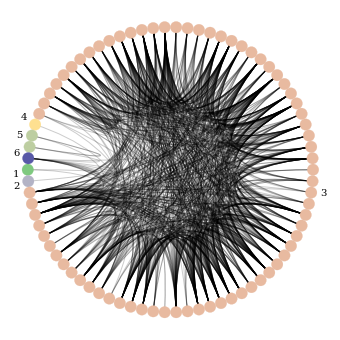

In [33]:
c = nv.plots.CircosPlot(G_labelled,node_grouping="subgraph", node_color="subgraph", 
                        #group_legend=True,
                       group_label_position="middle")
c.draw()
plt.show() 

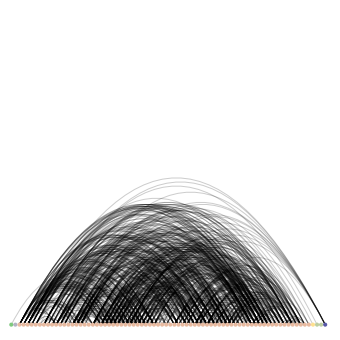

In [34]:
arc = nv.plots.ArcPlot(G_labelled,node_grouping="subgraph", node_color="subgraph"
                      # , node_size="followerCount"
                      )
arc.draw()
plt.show() 

## Bridges 

In graph theory, a bridge is an edge of a graph whose deletion increases the graph's number of connected components. Equivalently, an edge is a bridge if and only if it is not contained in any cycle. 

In [35]:
G_undir = nx.to_undirected(G)

In [36]:
print(nx.has_bridges(G_undir))

True


In [37]:
bridges=nx.bridges(G_undir)
print(list(bridges))
#NEXT: find out if bridges are meaningful!
for edge in bridges:
    for n1,n2 in edge:
        print(nx.degree(G_undir,n1))

[('chess24de', 'chesscom_de'), ('chess24de', 'Vlesk'), ('itsmahluna', 'WhiteCatOsu'), ('TrilluXe', 'pietsmietde')]


In [38]:
# the diameter of a graph is the longest of all possible shortest paths in the graph
# how wide is the graph?
print(nx.diameter(G_undir))

5


In [39]:
#A center of a graph is a node where the maximum distance (number of edges) 
#traversed to any other node is a minimum, compared to any other node. 
#Essentially, the center of a graph is the most centrally located node. 
#Note that there may be more than one node that qualifies as the center of the graph.
print(list(nx.center(G_undir)))

['Broeki2', 'BasoStream', 'Lara_Loft', 'KalleKoschinsky', 'itsmahluna', 'TrilluXe', 'H0llyLP', 'RevedTV', 'Dhalucard', 'BonjwaMental', 'Vlesk', 'AnniTheDuck', 'Gnu_Official_', 'TolkinLoL', 'Dekarldent', 'AmarCoDTV', 'noway4u_sir', 'Shlorox', 'Shurjoka', 'Mexify', 'LoLSola', 'mcky_tv', 'xHankyy', 'Papaplatte', 'Trymacs_YT', 'Angeschrien', 'SummonersInnDE', 'rewinside', 'maximmarkow', 'PhunkRoyaI', 'rezomusik', 'Taddl', 'noahreyli']


In [40]:
all_centralities_df=pd.DataFrame()
all_centralities_df["degree"]=nx.degree_centrality(G).values()
all_centralities_df["eigenvector"]=nx.eigenvector_centrality(G).values()
all_centralities_df["pagerank"]=nx.pagerank_numpy(G,weight=None).values()
all_centralities_df["betweenness"]=nx.betweenness_centrality(G).values()
all_centralities_df["closeness"]=nx.closeness_centrality(G).values()


In [41]:
all_centralities_df

,degree,eigenvector,pagerank,betweenness,closeness
0,0.454545,0.096742,0.014448,0.008887,0.495034
1,0.454545,0.129003,0.013877,0.003348,0.521897
2,0.831169,0.189312,0.026204,0.055871,0.595794
3,0.272727,0.036672,0.005746,0.000742,0.440031
4,0.311688,0.055636,0.008580,0.026423,0.457991
...,...,...,...,...,...
73,0.272727,0.019463,0.005663,0.001198,0.384712
74,0.415584,0.029656,0.006446,0.010184,0.413035
75,0.194805,0.023879,0.005382,0.000107,0.400742
76,0.051948,0.017044,0.003438,0.000011,0.384712


<function matplotlib.pyplot.show(close=None, block=None)>

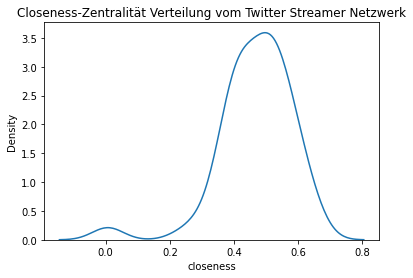

In [42]:
plt.title("Closeness-Zentralität Verteilung vom Twitter Streamer Netzwerk")
#sns.kdeplot(all_centralities_df["degree"], label="Degree")
#sns.kdeplot(all_centralities_df["eigenvector"], label="Eigenvektor")
#sns.kdeplot(all_centralities_df["pagerank"], label="PageRank")

#sns.kdeplot(all_centralities_df["betweenness"], label="Betwenness")
sns.kdeplot(all_centralities_df["closeness"], label="Closeness")

#plt.legend()
plt.savefig("cc_distr.png", dpi=300, bbox_inches='tight')
plt.show

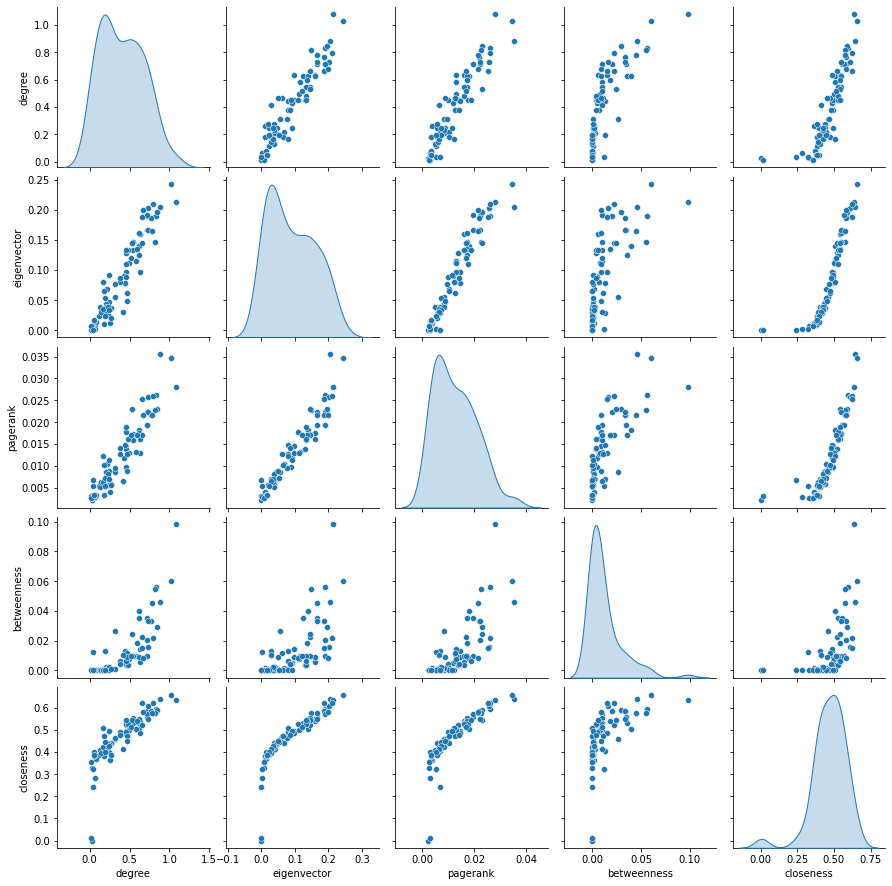

In [43]:
sns.pairplot(all_centralities_df, diag_kind="kde")
#diag_kind="kde"

## Pair Plot Insights: Full Data

- CM strongly positively correlated -> measure same type of power/importance for our network(more then expexted!)
- only BETWEENNESS CENTRALITY does not correlate well with the others -> measures different type of power!




Histograms:
- Closeness is left-skewed
- Betweenness is right-skewed
- Degree distributions tend to be right-skewed; that is, only a few nodes in most networks have most of the ties. Evenly distributed degree is much rarer -> our network is strongly connected (distributed graph) and this is a special finding

Correlations:
- between the measures strong correlations 
- follower counts only correlate slighty with measures, mostly its a messy point cloud without structure